<a href="https://colab.research.google.com/github/Adbe-El/Employee-Attrition/blob/main/Predicting_Employee_Attrition_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Employee Attrition Using Machine Learning & Python

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [ ]:
# Get the number of rows and cols
df.shape

(1677, 35)

In [ ]:
#Get the col data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [ ]:
#Get a count for the empty column

df.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [ ]:
#Check for any missing / null values in the data
df.isnull().values.any()

False

In [ ]:
#View some statistics
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [ ]:
#get a count of the number of employees that stayed and left the company
df['Attrition'].value_counts()

0    1477
1     200
Name: Attrition, dtype: int64

<Axes: ylabel='count'>

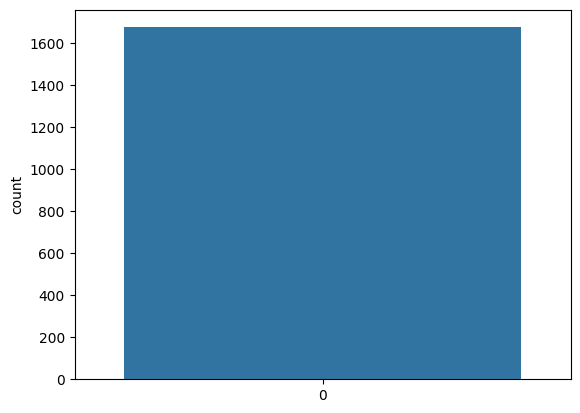

In [ ]:
#Visualise the number of employees that stayed and left the company.
sns.countplot(df['Attrition'])

In [ ]:
#Percentage if we just guessed 'No' for Attrition#
(1233 -237)/1233

0.8077858880778589

<Axes: xlabel='Age', ylabel='count'>

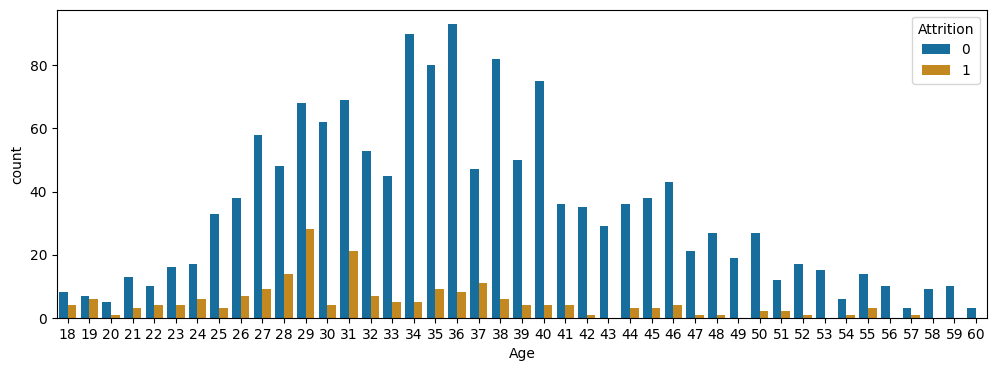

In [ ]:
#Show employees that stayed and left based on their ages
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x= 'Age', hue='Attrition', data=df, palette= 'colorblind')

In [ ]:
#Print all the data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('___________________________________________________________')

BusinessTravel : ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: BusinessTravel, dtype: int64
___________________________________________________________
Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64
___________________________________________________________
EducationField : ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: EducationField, dtype: int64
___________________________________________________________
Gender : ['Male' 'Female']
Male      1064
Female     613
Name: Gender, dtype: int64
___________________________________________________________
JobRole : ['Laboratory 

In [ ]:
#Remove unuseful columns
#df.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount'], axis =1, inplace=True)

In [ ]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
id,1.000000,0.027563,0.003572,0.007871,-0.015997,NaN,0.044271,-0.018994,-0.016039,0.021245,-0.002511,-0.005224,0.036047,-0.022619,-0.036811,-0.018226,0.018472,NaN,-0.041337,-0.004288,0.010423,-0.006236,-0.020820,-0.020064,-0.002203,-0.005955,-0.006598
Age,0.027563,1.000000,0.039686,-0.049025,0.223545,NaN,0.029557,0.030628,0.002101,0.479015,-0.009273,0.470758,0.010959,0.300044,-0.060012,-0.021206,0.056115,NaN,0.064863,0.648047,0.014303,0.034138,0.306628,0.219880,0.204357,0.201601,-0.161044
DailyRate,0.003572,0.039686,1.000000,0.024168,-0.007035,NaN,0.006483,-0.001213,-0.026725,0.041369,-0.037459,0.027375,-0.013332,-0.017337,-0.020007,-0.045213,0.001315,NaN,0.021273,0.058044,-0.023140,0.025152,0.066057,0.057011,0.037035,0.040969,-0.022380
DistanceFromHome,0.007871,-0.049025,0.024168,1.000000,-0.011436,NaN,0.004959,0.006191,0.010035,-0.051008,0.026309,-0.061019,0.020542,-0.031303,0.036970,0.039206,-0.011868,NaN,0.039086,-0.033573,-0.000239,-0.017184,-0.023564,-0.006670,-0.004215,0.013749,0.024741
Education,-0.015997,0.223545,-0.007035,-0.011436,1.000000,NaN,-0.011189,0.014862,0.052390,0.085823,-0.030686,0.081054,0.007133,0.092789,-0.025858,0.010790,-0.005253,NaN,0.041722,0.153291,-0.011924,-0.009697,0.116723,0.094065,0.050483,0.109573,-0.084305
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.044271,0.029557,0.006483,0.004959,-0.011189,NaN,1.000000,0.010202,0.014878,0.021551,-0.049272,0.021460,-0.013395,-0.041971,-0.043687,-0.051305,-0.035629,NaN,0.002093,0.022254,-0.028982,0.045387,0.009290,0.016942,0.028711,0.022839,-0.092426
HourlyRate,-0.018994,0.030628,-0.001213,0.006191,0.014862,NaN,0.010202,1.000000,-0.001867,-0.019059,-0.024347,-0.015572,-0.018454,0.060282,0.014730,0.018960,-0.035430,NaN,0.058745,-0.024953,0.039878,0.016693,-0.062826,-0.063928,-0.063522,-0.074527,-0.037280
JobInvolvement,-0.016039,0.002101,-0.026725,0.010035,0.052390,NaN,0.014878,-0.001867,1.000000,0.003865,0.035129,0.001476,-0.009055,-0.005984,0.056760,0.015324,0.014666,NaN,0.028960,0.001896,-0.018822,0.008476,-0.003354,0.007081,0.015706,0.009519,-0.139929
JobLevel,0.021245,0.479015,0.041369,-0.051008,0.085823,NaN,0.021551,-0.019059,0.003865,1.000000,-0.022297,0.909961,0.036769,0.116201,-0.102938,-0.054049,0.020189,NaN,0.019602,0.762163,-0.029599,0.014067,0.528175,0.401296,0.382727,0.400732,-0.137238


<ipython-input-19-6d9754ebe956>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.0%')


<Axes: >

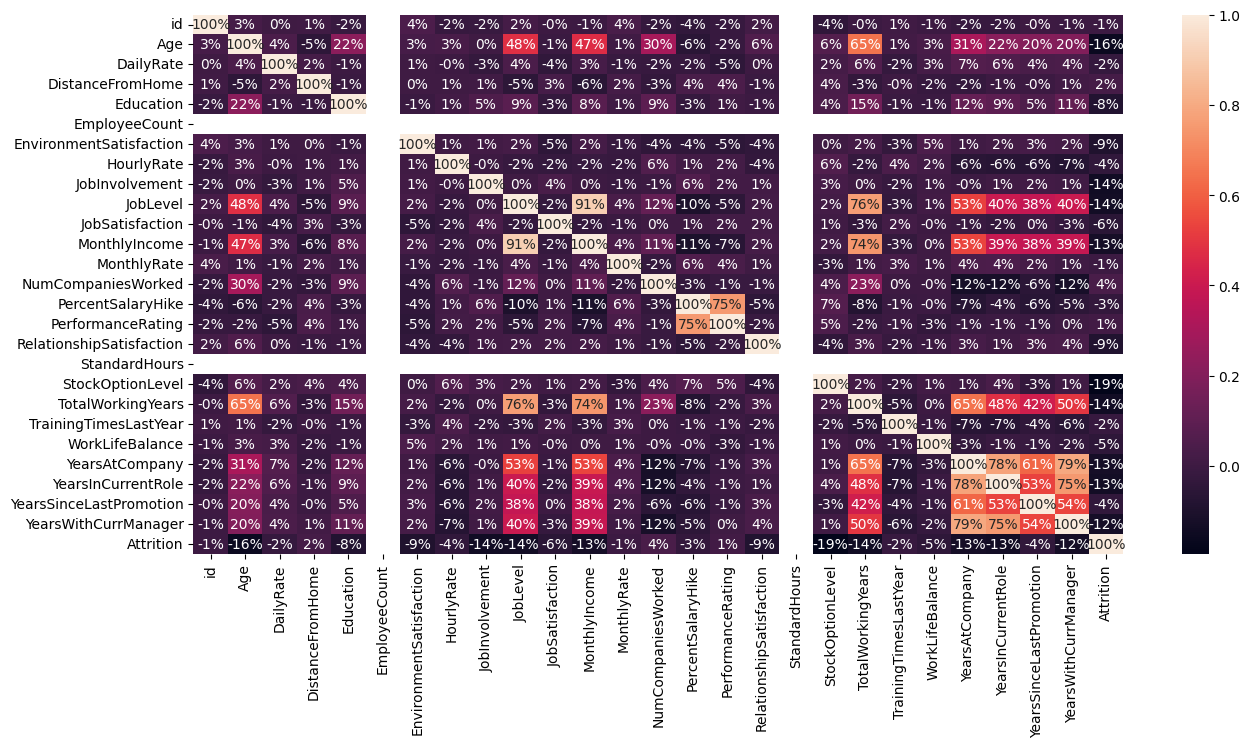

In [ ]:
#Visualize the correlation
plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.0%')

## Data Preprocessing

In [ ]:
#Tranform the data
#Transform non-numerical to numerical cols
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-19-021a6a0db75d>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-19-021a6a0db75d>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-19-021a6a0db75d>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-19-021a6a0db75d>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-19-021a6a0db75d>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprec

In [ ]:
for column in df_test.columns:
    if df_test[column].dtype == np.number:
        continue
    df_test[column] = LabelEncoder().fit_transform(df_test[column])

<Axes: >

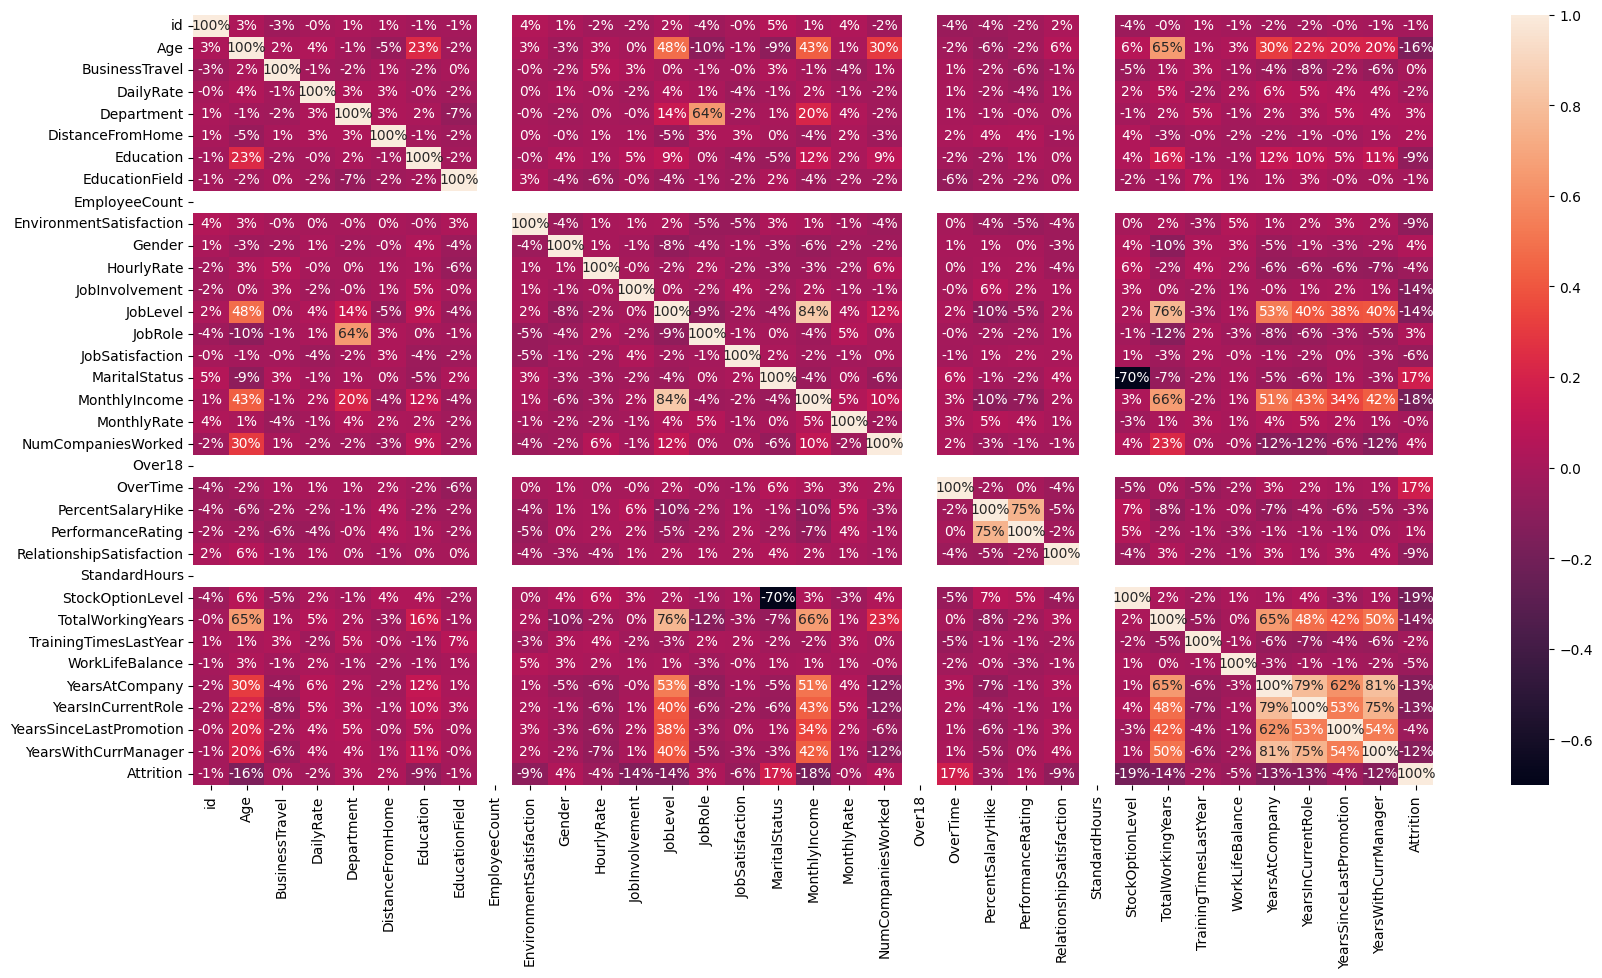

In [ ]:
#Visualize the correlation
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.0%')

### Feature Selection

In [ ]:
attr_corr = df.corr(method='pearson')['Attrition']

In [ ]:
# Varriables with less than 10% (positive/negative) correlation
attr_corr [(attr_corr > 0.1) | (attr_corr < - 0.1)]

Age                    -0.161044
JobInvolvement         -0.139929
JobLevel               -0.137350
MaritalStatus           0.174505
MonthlyIncome          -0.181939
OverTime                0.173965
StockOptionLevel       -0.194018
TotalWorkingYears      -0.138772
YearsAtCompany         -0.130393
YearsInCurrentRole     -0.133466
YearsWithCurrManager   -0.124712
Attrition               1.000000
Name: Attrition, dtype: float64

In [ ]:
selected_df = attr_corr [(attr_corr > 0.1) | (attr_corr < - 0.1)]
selected_df.index

Index(['Age', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

### More verification on Feature selection

In [ ]:
df.columns.values

array(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype=object)

In [ ]:
hr_vars=df.columns.values.tolist()
hr_y=['Attrition']
hr_X=[i for i in hr_vars if i not in hr_y]

In [ ]:
hr_X

['id',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Recursive Feature Elimination (RFE)
model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(df[hr_X], df[hr_y])
print(rfe.support_)
print(rfe.ranking_)

TypeError: ignored

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(df[hr_X], df[hr_y])
print(selector.support_)
print(selector.ranking_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[False False  True False False False  True False False  True False False
  True  True False False  True False False False False  True False  True
 False False  True False False False False False  True False]
[22  8  1 20 14 16  1 12 23  1  7 19  1  1 15  2  1 18 21 11 24  1  4  1
  5 25  1 17  9 10 13  6  1  3]


In [ ]:
data_values = [22, 8, 1, 20, 14, 16, 1, 12, 23, 1, 7, 19, 1, 1, 15, 2, 1, 18, 21, 11, 24, 1, 4, 1, 5, 25, 1, 17, 9, 10, 13, 6, 1, 3]
column_names=['id',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

one_values = [name for value, name in zip(data_values, column_names) if value == 1]
print(one_values)

['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'StockOptionLevel', 'YearsSinceLastPromotion']


In [ ]:
['Age', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'] == ['Age', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager']

True

### Modelling

In [ ]:
X= df[['Age', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager']]
y= df['Attrition']

In [ ]:
df_test_updated = df_test[['Age', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager']]

In [ ]:
#Split the data
X = df.iloc[:, 1:df.shape[1]].values
Y = df.iloc[:, 0].values

In [ ]:
#Split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
#Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#Get the accuracy on the training dataset
forest.score(X_train, Y_train)

0.9791288566243194

In [ ]:
#Show the confusion matrix and accuracy score for the model on the test data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Model Testing Accuracy = {}'.format((TP + TN)/(TP + TN + FP + FN)))

[[309   1]
 [ 49   9]]
Model Testing Accuracy = 0.8641304347826086


## Balancing the dataset

In [ ]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smt = SMOTE(random_state=0)
X_train_SMOTE, Y_train_SMOTE = smt.fit_resample(X_train, Y_train)

In [ ]:
#Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest_bal = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest_bal.fit(X_train_SMOTE, Y_train_SMOTE)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#Get the accuracy on the training dataset
forest_bal.score(X_train, Y_train)

0.9918330308529946

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Show the confusion matrix and accuracy score for the model on the test data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest_bal.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Model Testing Accuracy = {}'.format((TP + TN)/(TP + TN + FP + FN)))

[[289  21]
 [ 42  16]]
Model Testing Accuracy = 0.8288043478260869
